

```
# This is formatted as code
```

# Train the data with initial 8192 data

In [16]:
!git config --global use.email "kcshin3623@gmail.com"
!git config --global user.name "KwancheolShin"
#!mkdir cucumber_project
!cd cucumber_project
!pwd

!git clone https://github.com/KwancheolShin/Deep-Calderon-method.git
!git commit -m "Add Colab project"
!git push origin main

/content
fatal: destination path 'Deep-Calderon-method' already exists and is not an empty directory.
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 새 섹션

In [ ]:
pip install mat73

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

import mat73
from scipy.io import loadmat
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
import numpy as np


C=mat73.loadmat('/content/drive/My Drive/Colab Notebooks/phantom_ccm_unif_dist_64_calib.mat');
#print(C)
Recon = mat73.loadmat('/content/drive/My Drive/Colab Notebooks/delta_abs_ccm_1dot3_unif_dist_64_ns01_calib.mat')
#print(Recon)
c_mat_import = C["phantom_tri_cucum_tank_multi_new"]
Recon_import = Recon["delta_abs_scaled_mat_new"]

print(Recon_import.shape)
print(c_mat_import.shape)
print(Recon_import.shape[2])



IMG_WIDTH = 64
IMG_HEIGHT = 64
IMG_CHANNELS = 1

X_Data = np.zeros((Recon_import.shape[2], IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype = float)
Y_Data = np.zeros((c_mat_import.shape[2], IMG_HEIGHT,IMG_WIDTH,IMG_CHANNELS), dtype = float)

iter = range(Recon_import.shape[2])

for n in iter:

  X_Data[n] =Recon_import[:,:,n].real.reshape(IMG_WIDTH,IMG_HEIGHT,1)
  max_x = np.max(X_Data[n])
  min_x = np.min(X_Data[n])
  norm_x = max_x - min_x
  X_Data[n] =( X_Data[n]-min_x)/norm_x


  Y_Data[n] =c_mat_import[:,:,n].real.reshape(IMG_WIDTH,IMG_HEIGHT,1)
  max_y = np.max(Y_Data[n])
  min_y = np.min(Y_Data[n])
  norm_y = max_y - min_y
  Y_Data[n] = (Y_Data[n]-min_y)/norm_y


print(X_Data.shape)
print(Y_Data.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_Data, Y_Data, test_size = 0.10, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(64, 64, 3966)
(64, 64, 3966)
3966
(3966, 64, 64, 1)
(3966, 64, 64, 1)
(3569, 64, 64, 1)
(397, 64, 64, 1)
(3569, 64, 64, 1)
(397, 64, 64, 1)


971


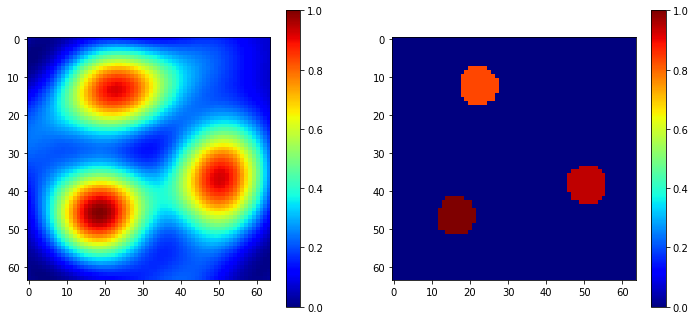

In [ ]:
import matplotlib.pyplot as plt
import random
# Perform a sanity check on some random training samples
xmx=np.amax(X_train)
xmn=np.amin(X_train)

ymx=np.amax(Y_train)
ymn=np.amin(Y_train)


ix = random.randint(0, len(X_train))
print(ix)
plt.figure(figsize = (12,12))
plt.subplot(221)
plt.imshow(np.squeeze(X_train[ix]),cmap='jet')
plt.colorbar()
plt.subplot(222)
plt.imshow(np.squeeze(Y_train[ix]),cmap='jet')
plt.colorbar()

# plt.subplot(223)
# plt.imshow(np.squeeze(X_train[ix].imag),cmap='jet')
# plt.colorbar()
# plt.subplot(224)
# plt.imshow(np.squeeze(Y_train[ix].imag),cmap='jet')
# plt.colorbar()
# plt.show

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 64, 64, 1)]  0           []                               
                                                                                                  
 conv2d_76 (Conv2D)             (None, 64, 64, 64)   1664        ['input_5[0][0]']                
                                                                                                  
 conv2d_77 (Conv2D)             (None, 64, 64, 64)   102464      ['conv2d_76[0][0]']              
                                                                                                  
 max_pooling2d_16 (MaxPooling2D  (None, 32, 32, 64)  0           ['conv2d_77[0][0]']              
 )                                                                                          

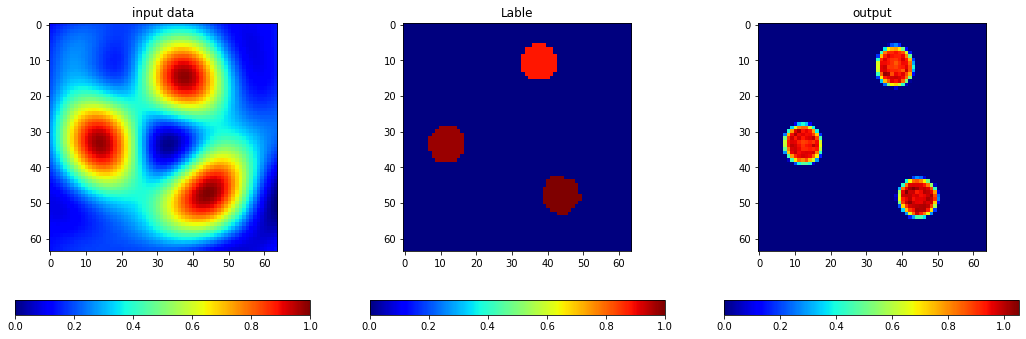

In [ ]:
from scipy.io import loadmat
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
import random
from tqdm import tqdm
from skimage.transform import resize
from keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.preprocessing.image import img_to_array

seed = 42
np.random.seed = seed

#Build the model
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))

#Contraction path
c1 = tf.keras.layers.Conv2D(64, (5, 5), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
#c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(64, (5, 5), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(128, (5, 5), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
#c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(128, (5, 5), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

c3 = tf.keras.layers.Conv2D(256, (5, 5), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
#c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(256, (5, 5), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

c4 = tf.keras.layers.Conv2D(512, (5, 5), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
#c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(512, (5, 5), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)

c5 = tf.keras.layers.Conv2D(1024, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)# changed (3,3) to (5,5)
#c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(1024, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#Expansive path
u6 = tf.keras.layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(512, (5, 5), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
#c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(512, (5, 5), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

u7 = tf.keras.layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(256, (5, 5), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
#c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(256, (5, 5), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

u8 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(128, (5, 5), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
#c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(128, (5, 5), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

u9 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(64, (5, 5), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
#c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(64, (5, 5), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='relu')(c9)

model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error', metrics=['accuracy'])
model.summary()

#model = tf.keras.models.load_model('Calderon_project1_simulated_tank_NoRot.h5')
################################
#Modelcheckpoint
#checkpointer = tf.keras.callbacks.ModelCheckpoint('Calderon_project1_simulated_ellips.h5', verbose=1, save_best_only=True, save_freq="epoch")
#('name of the model.h5',verbose=1 means we can see something on the screen,  )

#from tensorflow import keras

###########
# new_model = tf.keras.models.load_model('Calderon_project1_copperpipetank.h5')

callbacks = [tf.keras.callbacks.ModelCheckpoint('Cal_ccm_1dot3_unif_dist_64_calib.h5', verbose=1, save_best_only=True, save_freq="epoch"),     tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
        tf.keras.callbacks.TensorBoard(log_dir='logs'), ReduceLROnPlateau(monitor = 'val_loss', factor = 0.5, patience = 3, verbose = 1)]

results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=128, epochs=100,  callbacks=callbacks)

####################################
preds_train = model.predict(X_train, verbose=1)
preds_test = model.predict(X_test, verbose=1)

########## draw results ####################
ix = random.randint(0, len(X_test))
print(ix)

fig = plt.figure(figsize = (18,6))
ax = fig.add_subplot(131)
axp = ax.imshow(np.squeeze(X_test[ix].real),cmap='jet')
ax.set_title('input data')
cb = plt.colorbar(axp, ax =[ax], location = 'bottom')

ax = fig.add_subplot(132)
axp = ax.imshow(np.squeeze(Y_test[ix].real),cmap='jet')
ax.set_title('Lable')
cb = plt.colorbar(axp, ax =[ax], location = 'bottom')

ax = fig.add_subplot(133)
axp = ax.imshow(np.squeeze(preds_test[ix].real),cmap='jet')
ax.set_title('output')
cb = plt.colorbar(axp, ax =[ax], location = 'bottom')

############################
# fig = plt.figure(figsize = (18,6))
# ax = fig.add_subplot(131)
# axp = ax.imshow(np.squeeze(X_test[ix].imag),cmap='jet')
# ax.set_title('input data')
# cb = plt.colorbar(axp, ax =[ax], location = 'bottom')

# ax = fig.add_subplot(132)
# axp = ax.imshow(np.squeeze(Y_test[ix].imag),cmap='jet')
# ax.set_title('Lable')
# cb = plt.colorbar(axp, ax =[ax], location = 'bottom')

# ax = fig.add_subplot(133)
# axp = ax.imshow(np.squeeze(preds_test[ix].imag),cmap='jet')
# ax.set_title('output')
# cb = plt.colorbar(axp, ax =[ax], location = 'bottom')


385


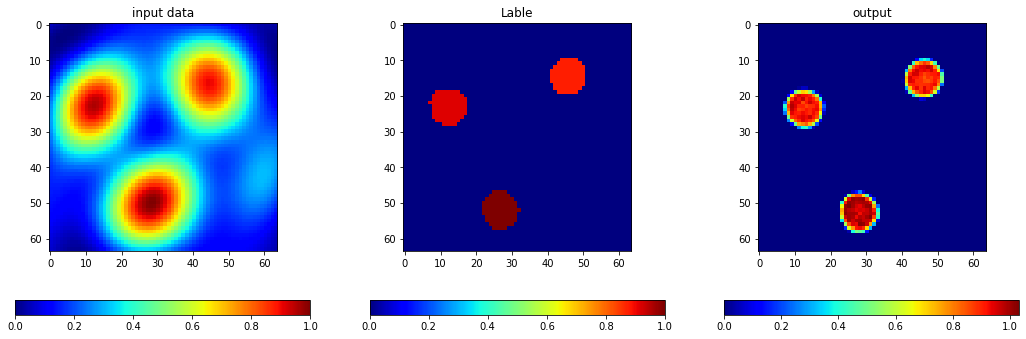

In [ ]:

ix = random.randint(0, len(X_test))
print(ix)

fig = plt.figure(figsize = (18,6))
ax = fig.add_subplot(131)
axp = ax.imshow(np.squeeze(X_test[ix].real),cmap='jet')
ax.set_title('input data')
cb = plt.colorbar(axp, ax =[ax], location = 'bottom')

ax = fig.add_subplot(132)
axp = ax.imshow(np.squeeze(Y_test[ix].real),cmap='jet')
ax.set_title('Lable')
cb = plt.colorbar(axp, ax =[ax], location = 'bottom')

ax = fig.add_subplot(133)
axp = ax.imshow(np.squeeze(preds_test[ix].real),cmap='jet')
ax.set_title('output')
cb = plt.colorbar(axp, ax =[ax], location = 'bottom')


In [ ]:
import scipy

file_path = 'X_test_abs_ccm_1dot3_unif_dist_64_calib.mat'
scipy.io.savemat(file_path, {'X_test_abs_ccm_1dot3_unif_dist_64_calib': X_test})


file_path = 'Y_test_abs_ccm_1dot3_unif_dist_64_calib.mat'
scipy.io.savemat(file_path, {'Y_test_abs_ccm_1dot3_unif_dist_64_calib': Y_test})


file_path = 'preds_test_abs_ccm_1dot3_unif_dist_64_calib.mat'
scipy.io.savemat(file_path, {'preds_test_abs_ccm_1dot3_unif_dist_64_calib': preds_test})



#######################

file_path = 'X_train_abs_ccm_1dot3_unif_dist_64_calib.mat'
scipy.io.savemat(file_path, {'X_train_abs_ccm_1dot3_unif_dist_64_calib': X_train})


file_path = 'Y_train_copperpipetank.mat'
scipy.io.savemat(file_path, {'Y_train_copperpipetank': Y_train})


file_path = 'preds_train_copperpipetank.mat'
scipy.io.savemat(file_path, {'preds_train_copperpipetank': preds_train})


import os;
print(os.getcwd())

/content


maxc =  0.22405904233797852
minc = 0.1648351168648315
normc= 0.05922392547314703
max_normal =  1.0
min_normal = 0.0
norm_normal = 1.0
1/1 [==============================] - 0s 16ms/step
maxpred =  1.1199758
minpred = 0.0
normpred= 1.1199758


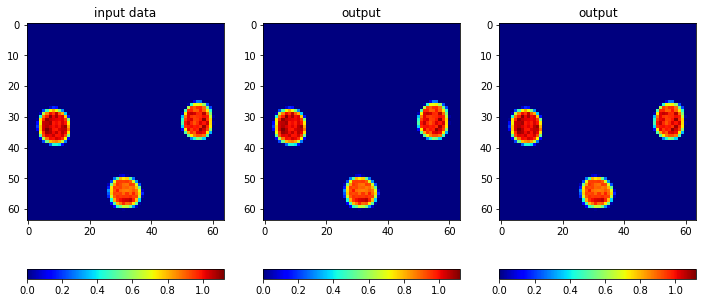

In [ ]:

#ccm_abs_load=loadmat('/content/drive/My Drive/Colab Notebooks/recon_diff_ccm_tri_1dot3_64.mat');
ccm_abs_load=loadmat('/content/recon_diff_ccm_tri_1dot3_64.mat');

ccm_abs_load_real = ccm_abs_load["recon_diff"].real
ccm_abs_real = ccm_abs_load_real.reshape((1,IMG_WIDTH,IMG_HEIGHT,1))

maxc = np.max(ccm_abs_real)
minc = np.min(ccm_abs_real)
normc = maxc - minc
print('maxc = ', maxc)
print('minc =', minc)
print('normc=', normc)

ccm_abs_real = (ccm_abs_real-minc)/normc

max_normal = np.max(ccm_abs_real)
min_normal = np.min(ccm_abs_real)
norm_normal = max_normal - min_normal

print('max_normal = ', max_normal)
print('min_normal =', min_normal)
print('norm_normal =', norm_normal)


ccm_abs_pred = model.predict(ccm_abs_real, verbose=1)

maxpred = np.max(ccm_abs_pred)
minpred = np.min(ccm_abs_pred)
normpred = maxpred - minpred

print('maxpred = ', maxpred)
print('minpred =', minpred)
print('normpred=', normpred)

##############################################
fig = plt.figure(figsize = (12,6))
ax = fig.add_subplot(131)
axp = ax.imshow(np.squeeze(ccm_abs_pred),cmap='jet')
ax.set_title('input data')
cb = plt.colorbar(axp, ax =[ax], location = 'bottom')

ax = fig.add_subplot(132)
axp = ax.imshow(np.squeeze(ccm_abs_pred),cmap='jet')
ax.set_title('output')
cb = plt.colorbar(axp, ax =[ax], location = 'bottom')

ax = fig.add_subplot(133)
axp = ax.imshow(np.squeeze(ccm_abs_pred),cmap='jet')
ax.set_title('output')
cb = plt.colorbar(axp, ax =[ax], location = 'bottom')

################################################
import scipy

file_path = 'preds_tank_diff_real_ccm_tri_1dot3_unif_dist_64_calib.mat'
scipy.io.savemat(file_path, {'preds_tank_diff_real_ccm_tri_1dot3_unif_dist_64_calib': ccm_abs_pred})



1/1 [==============================] - 0s 19ms/step


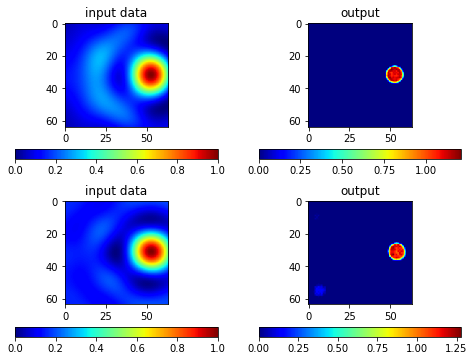

In [ ]:

#ccm_abs_load=loadmat('/content/drive/My Drive/Colab Notebooks/recon_diff_ccm_tri_1dot3_64.mat');
ccm_abs_load=mat73.loadmat('/content/delta_diff_test4.mat');
ccm_abs_load_real = ccm_abs_load["delta_diff_scaled"].real
ccm_abs_load_imag = ccm_abs_load["delta_diff_scaled"].imag
ccm_abs_real = ccm_abs_load_real.reshape((1,IMG_WIDTH,IMG_HEIGHT,1))
ccm_abs_imag = ccm_abs_load_imag.reshape((1,IMG_WIDTH,IMG_HEIGHT,1))


maxc = np.max(ccm_abs_real)
minc = np.min(ccm_abs_real)
normc = maxc - minc

ccm_abs_real = (ccm_abs_real-minc)/normc


maxc = np.max(ccm_abs_imag)
minc = np.min(ccm_abs_imag)
normc = maxc - minc

ccm_abs_imag = (ccm_abs_imag-minc)/normc


pred_ccm_abs_real = model.predict(ccm_abs_real, verbose=1)

pred_ccm_abs_imag = model.predict(ccm_abs_imag, verbose=1)


##############################################
fig = plt.figure(figsize = (8,6))

ax = fig.add_subplot(221)
axp = ax.imshow(np.squeeze(ccm_abs_real),cmap='jet')
ax.set_title('input data')
cb = plt.colorbar(axp, ax =[ax], location = 'bottom')

ax = fig.add_subplot(222)
axp = ax.imshow(np.squeeze(pred_ccm_abs_real),cmap='jet')
ax.set_title('output')
cb = plt.colorbar(axp, ax =[ax], location = 'bottom')


ax = fig.add_subplot(223)
axp = ax.imshow(np.squeeze(ccm_abs_imag),cmap='jet')
ax.set_title('input data')
cb = plt.colorbar(axp, ax =[ax], location = 'bottom')

ax = fig.add_subplot(224)
axp = ax.imshow(np.squeeze(pred_ccm_abs_imag),cmap='jet')
ax.set_title('output')
cb = plt.colorbar(axp, ax =[ax], location = 'bottom')


###############################################
import scipy
pred_ccm_diff_real =pred_ccm_abs_real
pred_ccm_diff_imag =pred_ccm_abs_imag


file_path = 'preds_tank_diff_real_ccm_test4.mat'
scipy.io.savemat(file_path, {'preds_tank_diff_real_ccm_test4': pred_ccm_diff_real})

file_path = 'preds_tank_diff_imag_ccm_test4.mat'
scipy.io.savemat(file_path, {'preds_tank_diff_imag_ccm_test4': pred_ccm_diff_imag})

In [ ]:

pipe1_diff=loadmat('/content/drive/My Drive/Colab Notebooks/gamma_diff_pipe_1dot3.mat');
pipe2_diff=loadmat('/content/drive/My Drive/Colab Notebooks/gamma_diff_pipe_2order_1dot3.mat');
pipe1_abs=loadmat('/content/drive/My Drive/Colab Notebooks/gamma_abs_pipe_1dot3.mat');
pipe2_abs=loadmat('/content/drive/My Drive/Colab Notebooks/gamma_abs_pipe_2order_1dot3.mat');

pipe1_diff = pipe1_diff["recon_diff_noprior"].real
pipe2_diff = pipe2_diff["recon_diff_noprior_second"].real
pipe1_abs = pipe1_abs["gamma_abs_noprior"].real
pipe2_abs = pipe2_abs["gamma_abs_noprior_second_order"].real


pipe1_diff = pipe1_diff.reshape((1,128,128,1))
pipe2_diff = pipe2_diff.reshape((1,128,128,1))
pipe1_abs = pipe1_abs.reshape((1,128,128,1))
pipe2_abs = pipe2_abs.reshape((1,128,128,1))


#data = data.reshape((data.shape[0], data.shape[1], 1))
pipe1_diff_pred = model.predict(pipe1_diff, verbose=1)
pipe2_diff_pred = model.predict(pipe2_diff, verbose=1)
pipe1_abs_pred = model.predict(pipe1_abs, verbose=1)
pipe2_abs_pred = model.predict(pipe2_abs, verbose=1)


import scipy

file_path = 'pipe1_diff_pred_1dot2_dot1.mat'
scipy.io.savemat(file_path, {'pipe1_diff_pred':pipe1_diff_pred})


file_path = 'pipe2_diff_pred_1dot2_dot1.mat'
scipy.io.savemat(file_path, {'pipe2_diff_pred': pipe2_diff_pred})



###############################################
fig = plt.figure(figsize = (12,6))
ax = fig.add_subplot(121)
axp = ax.imshow(np.squeeze(pipe1_diff),cmap='jet')
ax.set_title('input data')
cb = plt.colorbar(axp, ax =[ax], location = 'bottom')

ax = fig.add_subplot(122)
axp = ax.imshow(np.squeeze(pipe1_diff_pred),cmap='jet')
ax.set_title('output')
cb = plt.colorbar(axp, ax =[ax], location = 'bottom')

##################
fig = plt.figure(figsize = (12,6))
ax = fig.add_subplot(121)
axp = ax.imshow(np.squeeze(pipe2_diff),cmap='jet')
ax.set_title('input data')
cb = plt.colorbar(axp, ax =[ax], location = 'bottom')

ax = fig.add_subplot(122)
axp = ax.imshow(np.squeeze(pipe2_diff_pred),cmap='jet')
ax.set_title('output')
cb = plt.colorbar(axp, ax =[ax], location = 'bottom')
##########################################
fig = plt.figure(figsize = (12,6))
ax = fig.add_subplot(121)
axp = ax.imshow(np.squeeze(pipe1_abs),cmap='jet')
ax.set_title('input data')
cb = plt.colorbar(axp, ax =[ax], location = 'bottom')

ax = fig.add_subplot(122)
axp = ax.imshow(np.squeeze(pipe1_abs_pred),cmap='jet')
ax.set_title('output')
cb = plt.colorbar(axp, ax =[ax], location = 'bottom')
##########################################
fig = plt.figure(figsize = (12,6))
ax = fig.add_subplot(121)
axp = ax.imshow(np.squeeze(pipe2_abs),cmap='jet')
ax.set_title('input data')
cb = plt.colorbar(axp, ax =[ax], location = 'bottom')

ax = fig.add_subplot(122)
axp = ax.imshow(np.squeeze(pipe2_abs_pred),cmap='jet')
ax.set_title('output')
cb = plt.colorbar(axp, ax =[ax], location = 'bottom')



In [ ]:
plt.plot(results.history['loss'], label = 'train')
plt.plot(results.history['val_loss'],label = 'validation')
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()



In [ ]:
print(preds_test.shape)
print(type(preds_test))


In [ ]:
import scipy

file_path = 'X_test_copperpipetank.mat'
scipy.io.savemat(file_path, {'X_test_copperpipetank': X_test})


file_path = 'Y_test_copperpipetank.mat'
scipy.io.savemat(file_path, {'Y_test_copperpipetank': Y_test})


file_path = 'preds_test_copperpipetank.mat'
scipy.io.savemat(file_path, {'preds_test_copperpipetank': preds_test})



#######################

file_path = 'X_train_copperpipetank.mat'
scipy.io.savemat(file_path, {'X_train_copperpipetank': X_test})


file_path = 'Y_train_copperpipetank.mat'
scipy.io.savemat(file_path, {'Y_train_copperpipetank': Y_test})


file_path = 'preds_train_copperpipetank.mat'
scipy.io.savemat(file_path, {'preds_train_copperpipetank': preds_test})


import os;
print(os.getcwd())

# Trainging by using previous network


In [ ]:
pip install mat73


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

import mat73
from scipy.io import loadmat
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
import numpy as np


C=loadmat('/content/drive/My Drive/Colab Notebooks/phantom_copper_pipe_tank_multi_delta.mat');
#print(C)
Recon = mat73.loadmat('/content/drive/My Drive/Colab Notebooks/delta_diff_scaled_copperpipetank_mat_1dot4_scale1dot1.mat')
#print(Recon)
c_mat_import = C["phantom_copper_pipe_tank_multi"]
Recon_import = Recon["delta_diff_scaled_mat"]

print(Recon_import.shape)
print(c_mat_import.shape)
print(Recon_import.shape[2])


IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 1

X_Data = np.zeros((Recon_import.shape[2], IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.float64)
Y_Data = np.zeros((c_mat_import.shape[2], IMG_HEIGHT,IMG_WIDTH,IMG_CHANNELS), dtype=np.float64)

iter = range(Recon_import.shape[2])

for n in iter:
  X_Data[n] =Recon_import[:,:,n].real.reshape(IMG_WIDTH,IMG_HEIGHT,1)
  Y_Data[n] =c_mat_import[:,:,n].reshape(IMG_WIDTH,IMG_HEIGHT,1)


print(X_Data.shape)
print(Y_Data.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_Data, Y_Data, test_size = 0.10, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(128, 128, 8192)
(128, 128, 8192)
8192
(8192, 128, 128, 1)
(8192, 128, 128, 1)
(7372, 128, 128, 1)
(820, 128, 128, 1)
(7372, 128, 128, 1)
(820, 128, 128, 1)


Epoch 1/100
52/52 [==============================] - ETA: 0s - loss: 0.0021 - accuracy: 0.6592
Epoch 1: val_loss improved from inf to 0.00212, saving model to Calderon_project1_copperpipetank.h5
52/52 [==============================] - 224s 3s/step - loss: 0.0021 - accuracy: 0.6592 - val_loss: 0.0021 - val_accuracy: 0.6740 - lr: 5.0000e-05
Epoch 2/100
52/52 [==============================] - ETA: 0s - loss: 0.0020 - accuracy: 0.6592
Epoch 2: val_loss improved from 0.00212 to 0.00196, saving model to Calderon_project1_copperpipetank.h5
52/52 [==============================] - 128s 2s/step - loss: 0.0020 - accuracy: 0.6592 - val_loss: 0.0020 - val_accuracy: 0.6740 - lr: 5.0000e-05
Epoch 3/100
52/52 [==============================] - ETA: 0s - loss: 0.0019 - accuracy: 0.6592
Epoch 3: val_loss did not improve from 0.00196
52/52 [==============================] - 125s 2s/step - loss: 0.0019 - accuracy: 0.6592 - val_loss: 0.0020 - val_accuracy: 0.6740 - lr: 5.0000e-05
Epoch 4/100
52/52 [====

<function matplotlib.pyplot.show(*args, **kw)>

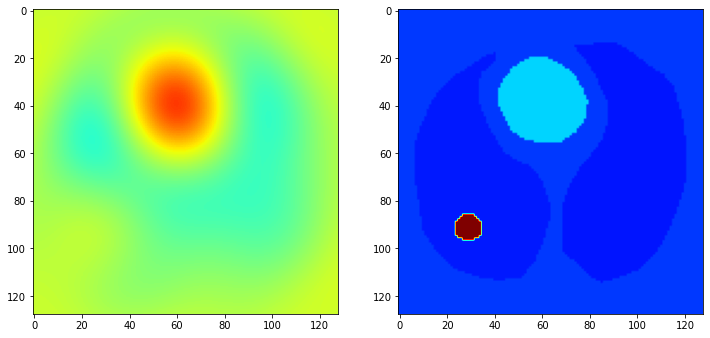

In [ ]:
from scipy.io import loadmat
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
import random
from tqdm import tqdm
from skimage.transform import resize
from keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow import keras

###########
new_model = tf.keras.models.load_model('Calderon_project1_copperpipetank.h5')
#model.summary()
callbacks = [tf.keras.callbacks.ModelCheckpoint('Calderon_project1_copperpipetank.h5', verbose=1, save_best_only=True, save_freq="epoch"),     tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
        tf.keras.callbacks.TensorBoard(log_dir='logs'), ReduceLROnPlateau(monitor = 'val_loss', factor = 0.5, patience = 3, verbose = 1)]

results =new_model.fit(X_train, Y_train, validation_split=0.1, batch_size=128, epochs=100,  callbacks=callbacks)

xmx=np.amax(X_Data)
xmn=np.amin(X_Data)

ymx=np.amax(Y_Data)
ymn=np.amin(Y_Data)


ix = random.randint(0, len(X_Data))
print(ix)
plt.figure(figsize = (12,6))
plt.subplot(121)
plt.imshow(np.squeeze(X_Data[ix]),cmap='jet',vmin = xmn, vmax=xmx)
plt.subplot(122)
plt.imshow(np.squeeze(Y_Data[ix]),cmap='jet',vmin=ymn, vmax=ymx)
plt.show



In [ ]:

##########
#preds_train = model.predict(X_train, verbose=1)
preds_test = new_model.predict(X_test, verbose=1)


pmx=np.amax(preds_test)
pmn=np.amin(preds_test)


26/26 [==============================] - 5s 177ms/step


In [ ]:
ix = random.randint(0, len(X_Data))
print(ix)

fig = plt.figure(figsize = (18,6))
ax = fig.add_subplot(131)
axp = ax.imshow(np.squeeze(X_Data[ix]),cmap='jet',vmin=xmn, vmax= xmx)
ax.set_title('input data')
cb = plt.colorbar(axp, ax =[ax], location = 'bottom')

ax = fig.add_subplot(132)
axp = ax.imshow(np.squeeze(Y_Data[ix]),cmap='jet',vmin=ymn, vmax= ymx)
ax.set_title('Lable')
cb = plt.colorbar(axp, ax =[ax], location = 'bottom')

ax = fig.add_subplot(133)
axp = ax.imshow(np.squeeze(preds_test[ix]),cmap='jet',vmin=ymn, vmax= ymx)
ax.set_title('output')
cb = plt.colorbar(axp, ax =[ax], location = 'bottom')